In [1]:
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/penguins.csv", encoding="utf-8")

| 컬럼명 | 설명 |
| --- | --- |
| species | 펭귄 종 |
| island | 팔머 남극의 섬 이름 |
| species | 펭귄 종 |
| culmen_length_mm | 부리의 길이(mm) |
| culmen_depth_mm | 부리의 깊이(mm) |
| flipper_length_mm | 날개 길이(mm) |
| body_mass_g | 체중(g) |
| sex | 펭귄 성별 |

## **펭귄 데이터 전처리-1**

In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df[(df["sex"].isnull()) | (df["sex"] == ".")]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [5]:
# species, island를 제외한 모든 컬럼값이 null인 행 제거
df = df.dropna(subset=["culmen_length_mm"])

In [6]:
df["sex"] = df["sex"].fillna("Unknown")
df.loc[df["sex"] == ".", "sex"] = "Unknown"

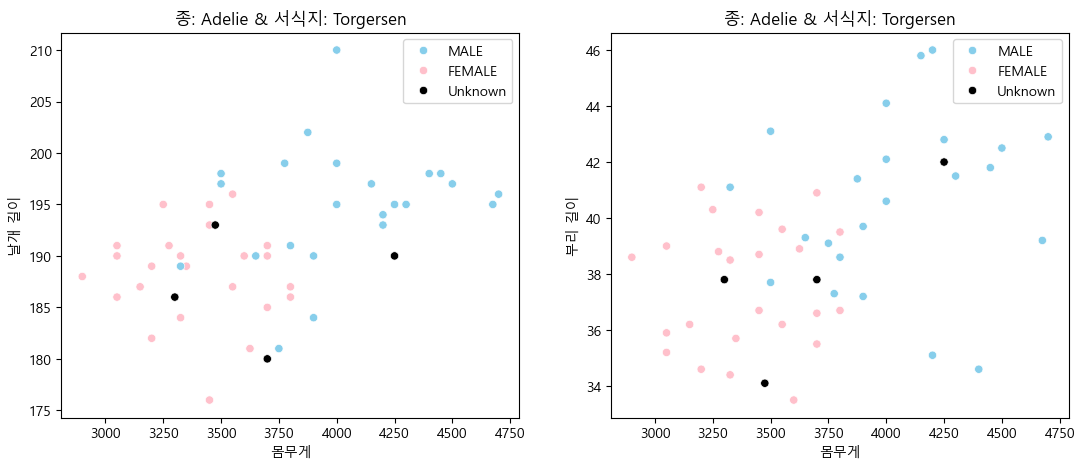

In [7]:
plt.rc("font", family = "Malgun Gothic")

adelie_torgersen_df = df[(df["species"] == "Adelie") & (df["island"] == "Torgersen")]
fig, axes = plt.subplots(1, 2, figsize=(13, 5)) 

sns.scatterplot(data=adelie_torgersen_df, x="body_mass_g", y="flipper_length_mm", hue="sex",
                palette={"MALE": "skyblue", "FEMALE": "pink", "Unknown": "black"}, ax=axes[0])
axes[0].set_title("종: Adelie & 서식지: Torgersen")
axes[0].set_xlabel("몸무게")
axes[0].set_ylabel("날개 길이")
axes[0].legend(title="")

sns.scatterplot(data=adelie_torgersen_df, x="body_mass_g", y="culmen_length_mm", hue="sex",
                palette={"MALE": "skyblue", "FEMALE": "pink", "Unknown": "black"}, ax=axes[1])
axes[1].set_title("종: Adelie & 서식지: Torgersen")
axes[1].set_xlabel("몸무게")
axes[1].set_ylabel("부리 길이")
axes[1].legend(title="")

plt.show()

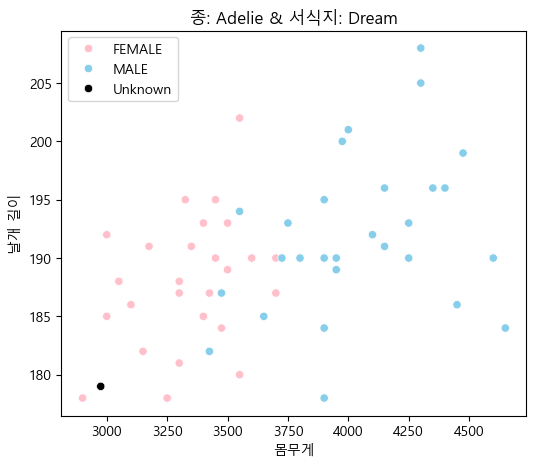

In [8]:
plt.rc("font", family = "Malgun Gothic")

adelie_dream_df = df[(df["species"] == "Adelie") & (df["island"] == "Dream")]

plt.figure(figsize=(6, 5))

sns.scatterplot(data=adelie_dream_df, x="body_mass_g", y="flipper_length_mm", hue="sex",
               palette={"MALE": "skyblue", "FEMALE": "pink", "Unknown": "black"})

plt.title("종: Adelie & 서식지: Dream")
plt.xlabel("몸무게")
plt.ylabel("날개 길이")
plt.legend(title="")
plt.show()

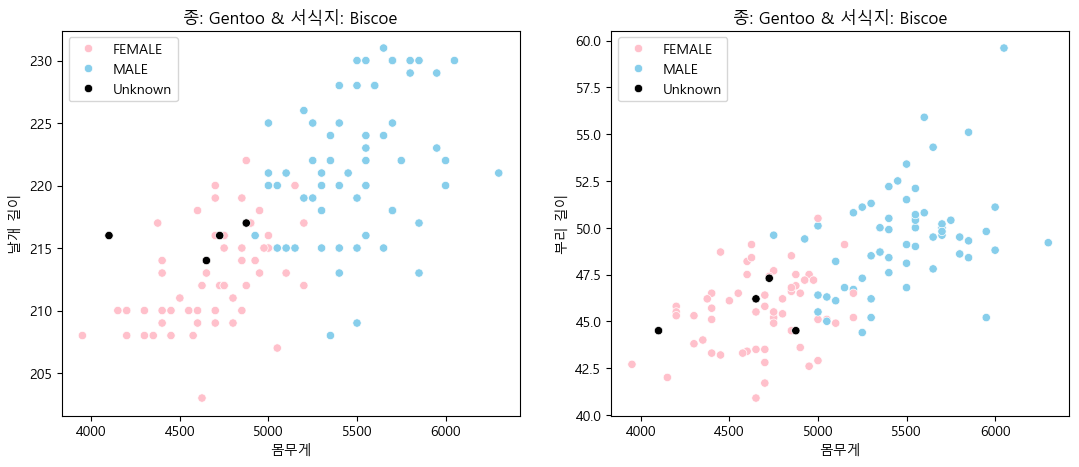

In [9]:
plt.rc("font", family = "Malgun Gothic")

gentoo_biscoe_df = df[(df["species"] == "Gentoo") & (df["island"] == "Biscoe")]
fig, axes = plt.subplots(1, 2, figsize=(13, 5)) 

sns.scatterplot(data=gentoo_biscoe_df, x="body_mass_g", y="flipper_length_mm", hue="sex",
                palette={"MALE": "skyblue", "FEMALE": "pink", "Unknown": "black"}, ax=axes[0])
axes[0].set_title("종: Gentoo & 서식지: Biscoe")
axes[0].set_xlabel("몸무게")
axes[0].set_ylabel("날개 길이")
axes[0].legend(title="")

sns.scatterplot(data=gentoo_biscoe_df, x="body_mass_g", y="culmen_length_mm", hue="sex",
                palette={"MALE": "skyblue", "FEMALE": "pink", "Unknown": "black"}, ax=axes[1])
axes[1].set_title("종: Gentoo & 서식지: Biscoe")
axes[1].set_xlabel("몸무게")
axes[1].set_ylabel("부리 길이")
axes[1].legend(title="")

plt.show()

### **Unknown 값 채우기**

In [10]:
df[df["sex"] == "Unknown"]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,Unknown
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,Unknown
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,Unknown
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,Unknown
47,Adelie,Dream,37.5,18.9,179.0,2975.0,Unknown
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,Unknown
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,Unknown
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,Unknown
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,Unknown


In [11]:
# species=Adelie & island=Torgersen
condition = (df["sex"] == "Unknown") & (df["species"] == "Adelie") & (df["island"] == "Torgersen")

df.loc[condition & (df["body_mass_g"] == 3300.0), "sex"] = "FEMALE"
df.loc[condition & (df["body_mass_g"] == 3475.0), "sex"] = "FEMALE"
df.loc[condition & (df["body_mass_g"] == 3700.0), "sex"] = "FEMALE"
df.loc[condition & (df["body_mass_g"] == 4250.0), "sex"] = "MALE"

In [12]:
# species=Adelie & island=Dream
condition = (df["sex"] == "Unknown") & (df["species"] == "Adelie") & (df["island"] == "Dream")
df.loc[condition, "sex"] = "FEMALE"

In [13]:
# species=Gentoo & island=Biscoe
condition = (df["sex"] == "Unknown") & (df["species"] == "Gentoo") & (df["island"] == "Biscoe")
df.loc[condition, "sex"] = "FEMALE"

## **펭귄 데이터 EDA**

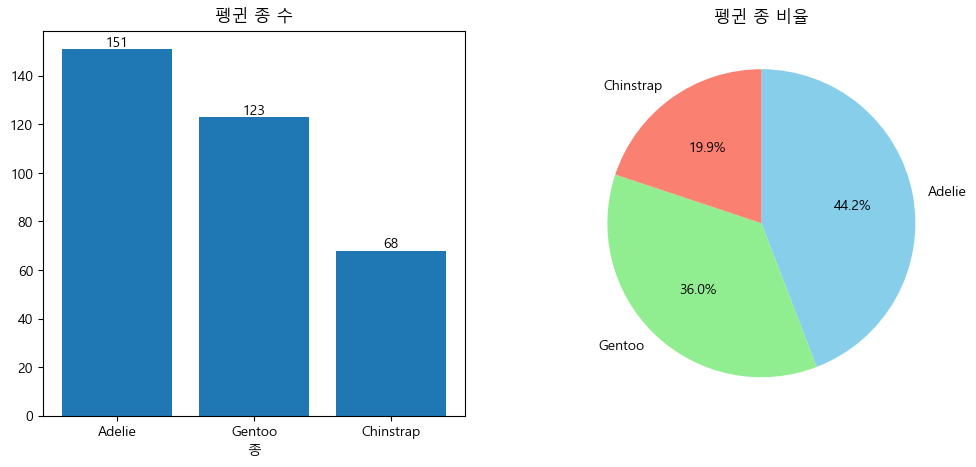

In [14]:
plt.rc("font", family = "Malgun Gothic")

species_counts = df["species"].value_counts()

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bars = ax1.bar(species_counts.index, species_counts.values)

for bar in bars:
    yval = bar.get_height() 
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom", fontsize=10)
    
ax1.set_xlabel("종")
ax1.set_ylabel("")
ax1.set_title("펭귄 종 수")

ax2.pie(species_counts, 
        labels=species_counts.index, 
        autopct="%1.1f%%", 
        startangle=90, 
        counterclock=False,
        colors=["skyblue", "lightgreen", "salmon"])
ax2.set_title("펭귄 종 비율")

plt.show()

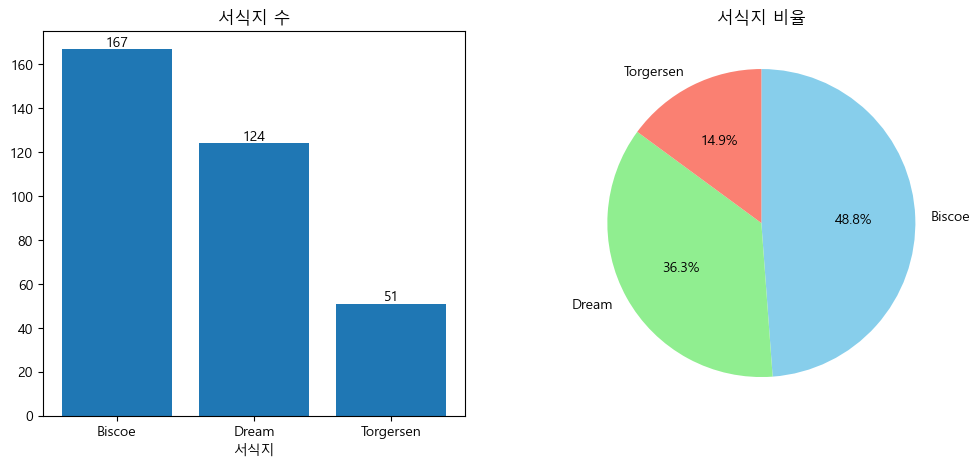

In [15]:
plt.rc("font", family = "Malgun Gothic")

island_counts = df["island"].value_counts()

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

bars = ax1.bar(island_counts.index, island_counts.values)

for bar in bars:
    yval = bar.get_height() 
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha="center", va="bottom", fontsize=10)
    
ax1.set_xlabel("서식지")
ax1.set_ylabel("")
ax1.set_title("서식지 수")

ax2.pie(island_counts, 
        labels=island_counts.index, 
        autopct="%1.1f%%", 
        startangle=90, 
        counterclock=False,
        colors=["skyblue", "lightgreen", "salmon"])
ax2.set_title("서식지 비율")

plt.show()

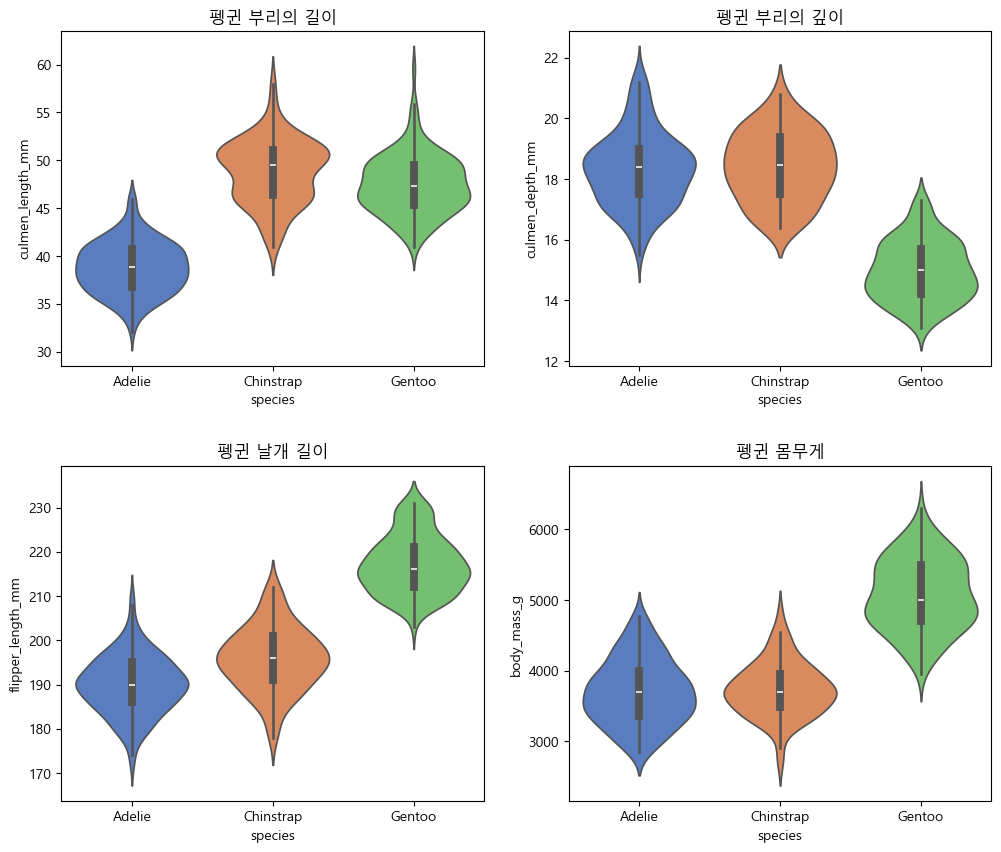

In [16]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.violinplot(x="species", y=columns[i], data=df, ax=ax, hue="species", palette="muted", legend=False)
    ax.set_title(titles[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

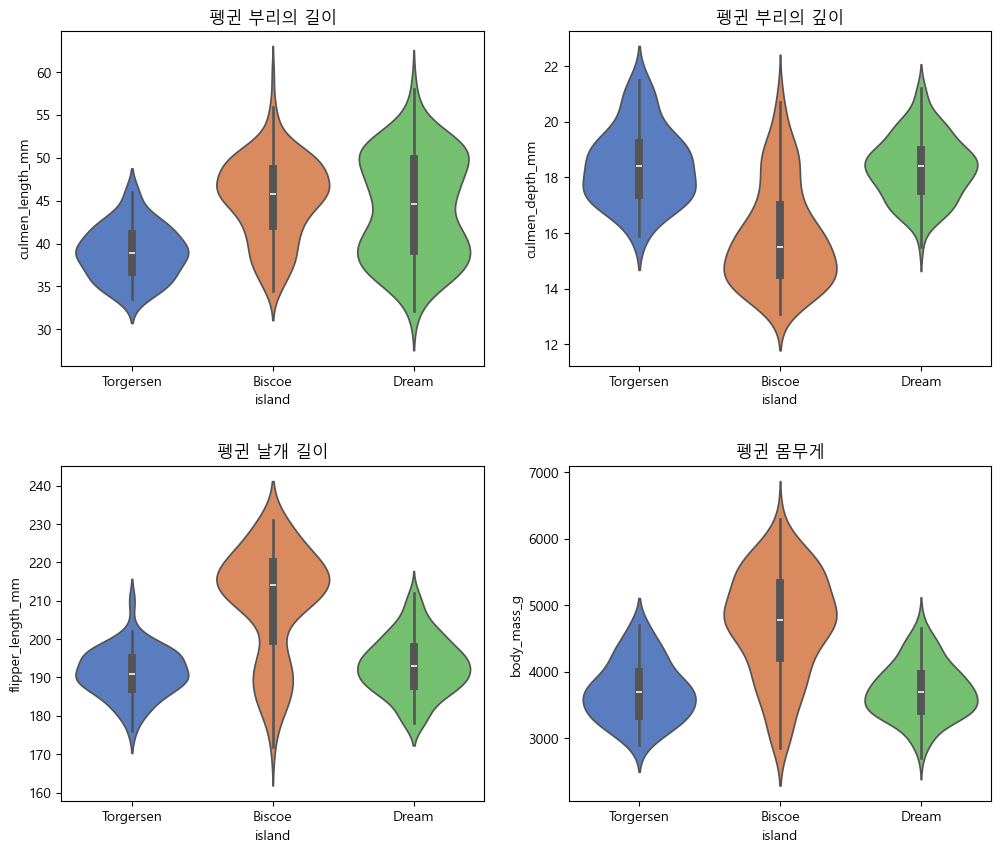

In [17]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.violinplot(x="island", y=columns[i], data=df, ax=ax, hue="island", palette="muted", legend=False)
    ax.set_title(titles[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

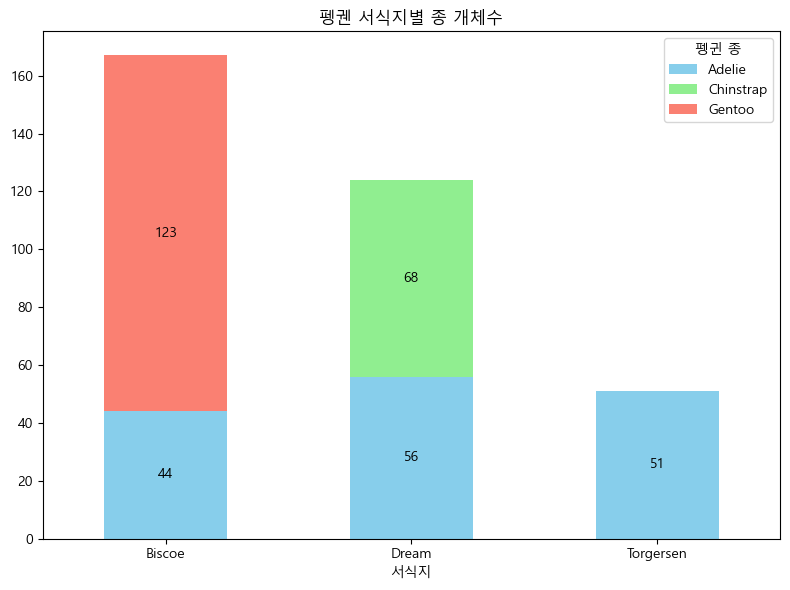

In [18]:
plt.rc("font", family = "Malgun Gothic")

counts = df[["island", "species"]].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

bars = counts.unstack().plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "lightgreen", "salmon"])

for bar in bars.containers:
    for patch in bar:
        height = patch.get_height()
        if height > 0:  # 높이가 0이 아닐 때만 값 표시
            ax.text(
                patch.get_x() + patch.get_width() / 2,  # x 위치
                patch.get_y() + height / 2,  # y 위치 (블록의 중심에 텍스트 위치)
                int(height),  # 텍스트 내용
                ha="center",  # 수평 정렬
                va="center",  # 수직 정렬
                fontsize=10,  # 폰트 크기
                color="black"  # 폰트 색상
            )
            
ax.set_xlabel("서식지")
ax.set_ylabel("")
ax.set_title("펭궨 서식지별 종 개체수")
plt.xticks(rotation=0)
plt.legend(title="펭귄 종")
plt.tight_layout()
plt.show()

## **종과 성별에 따른 펭귄들의 EDA**

### **Adelie펭귄 성별에 따른 차이**

In [19]:
Adelie_df = df[df["species"] == "Adelie"]

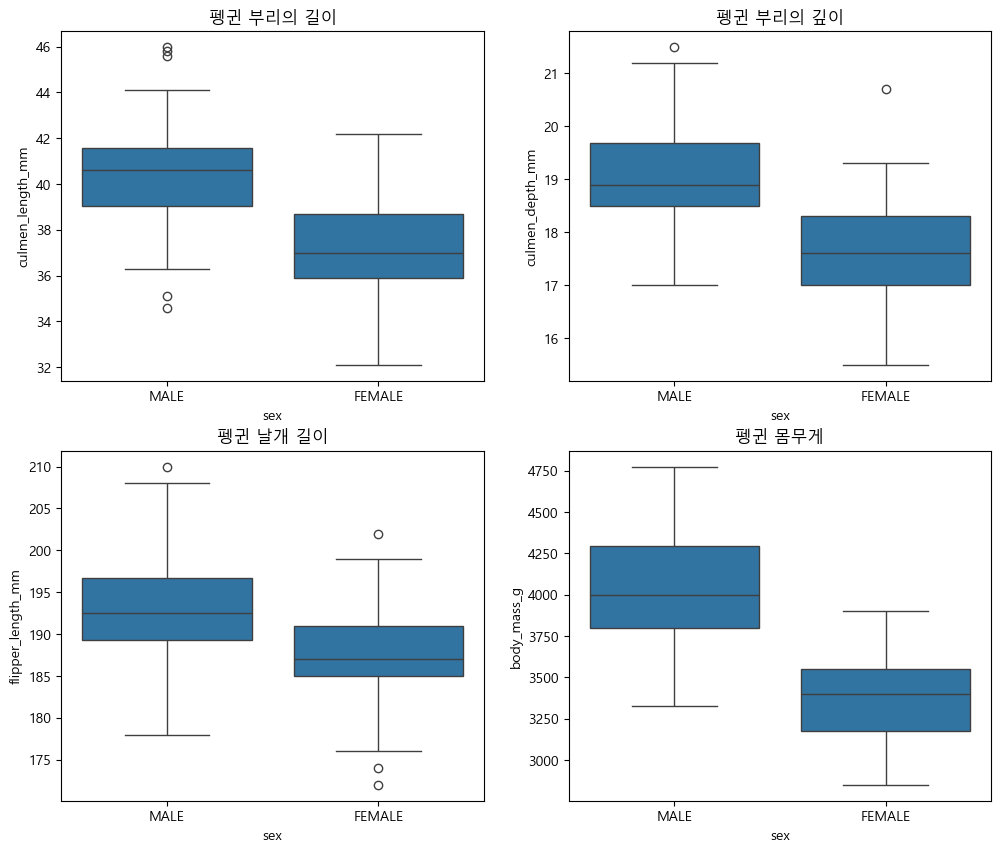

In [20]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x="sex", y=columns[i], data=Adelie_df, ax=ax)
    ax.set_title(titles[i])

plt.show()

### **Chinstrap펭귄 성별에 따른 차이**

In [21]:
Chinstrap_df = df[df["species"] == "Chinstrap"]

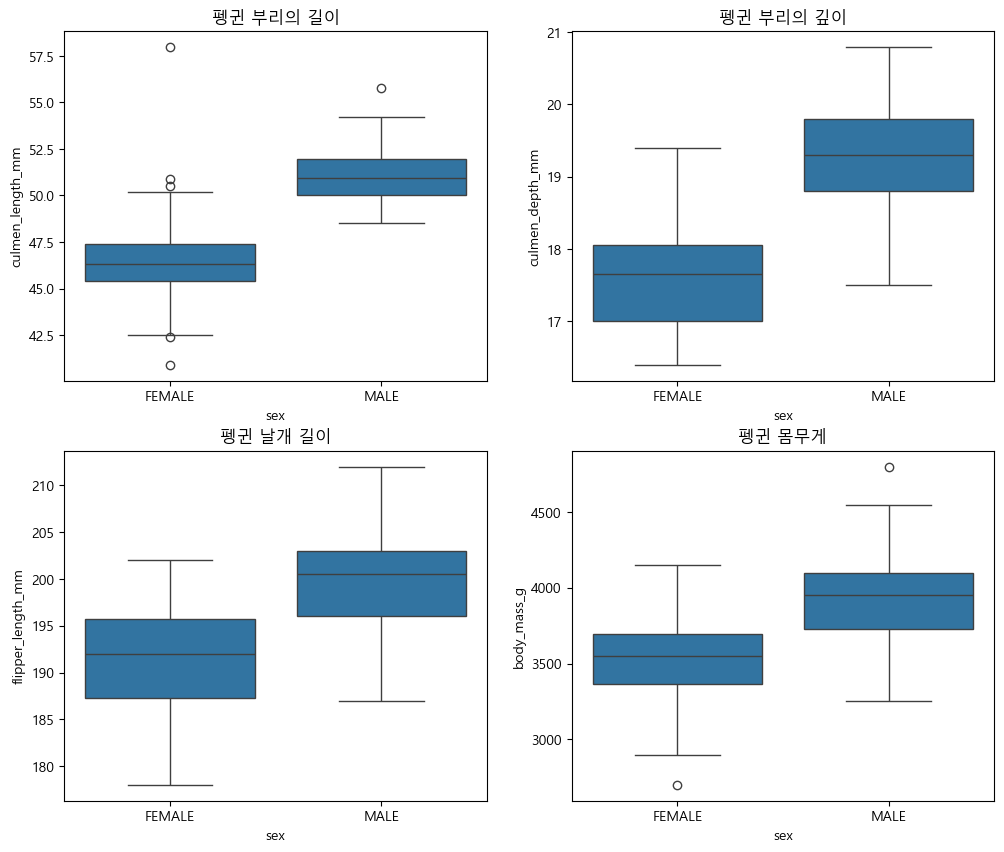

In [22]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x="sex", y=columns[i], data=Chinstrap_df, ax=ax)
    ax.set_title(titles[i])

plt.show()

### **Gentoo펭귄 성별에 따른 차이**

In [23]:
Gentoo_df = df[df["species"] == "Gentoo"]

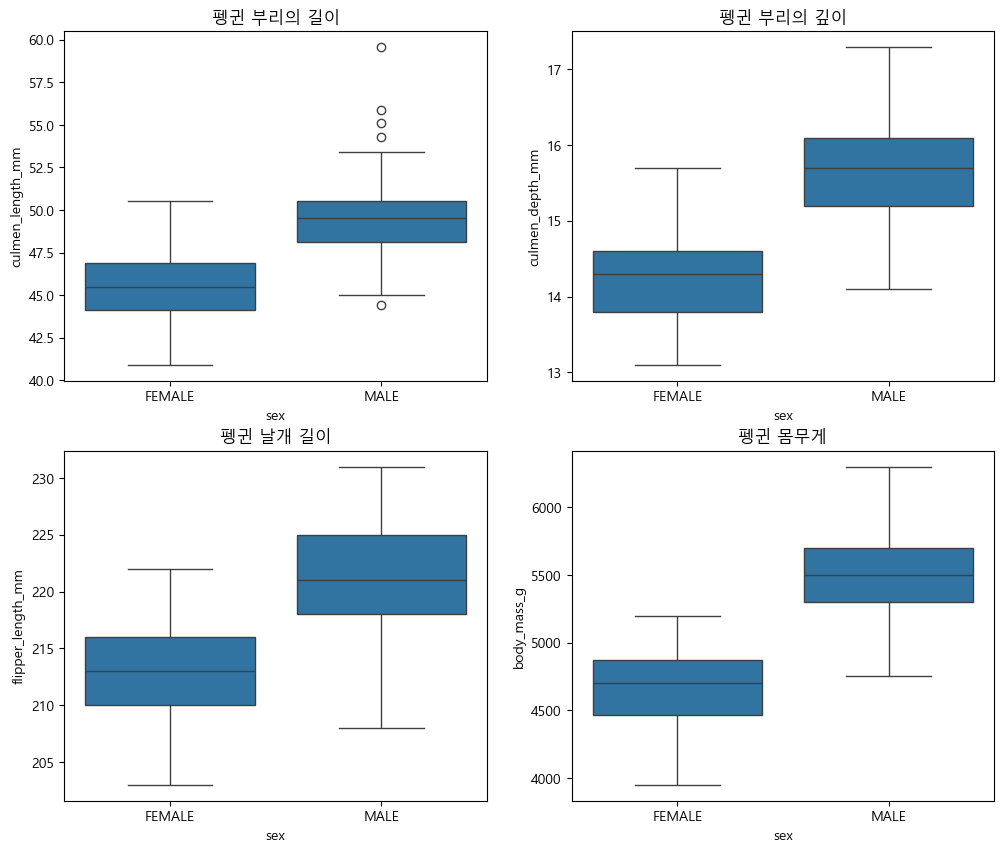

In [24]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x="sex", y=columns[i], data=Gentoo_df, ax=ax)
    ax.set_title(titles[i])

plt.show()

### **모든 펭귄의 성별에 따른 분포**

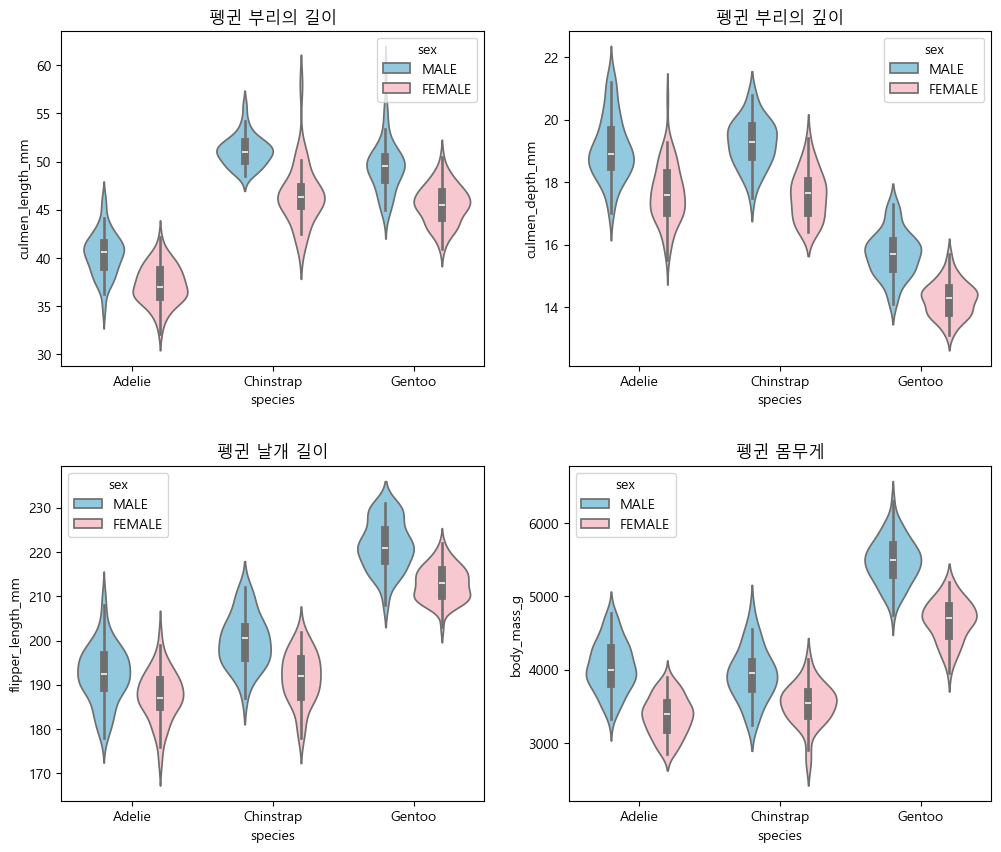

In [25]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

palette = {"MALE": "skyblue", "FEMALE": "pink"}
for i, ax in enumerate(axes.flat):
    sns.violinplot(x="species", y=columns[i], data=df, hue="sex", palette=palette, ax=ax)
    ax.set_title(titles[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

In [26]:
from scipy import stats

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
species_list = df["species"].unique()

for species in species_list:
    print(f"\n종: {species}")
    
    species_df = df[df["species"] == species]
    male = species_df[species_df["sex"] == "MALE"][columns]
    female = species_df[species_df["sex"] == "FEMALE"][columns]
    
    for column in columns:
        # 등분산성 검정
        statistic, p_value = stats.levene(male[column], female[column])
        if p_value > 0.05:
            print(f"{column}: 등분산 가정 만족 (p-value: {p_value:.4f})")
        else:
            print(f"{column}: 이분산 가정 만족 (p-value: {p_value:.4f})")

        # T-검정
        statistic, p_value = stats.ttest_ind(
            a=male[column],
            b=female[column],
            alternative="two-sided",
            equal_var=p_value > 0.05  
        )
        print(f"{column}: p-value = {p_value}")
        if p_value < 0.05:
            print(f"{column}: 성별에 따른 평균 차이가 유의미합니다.")
        else:
            print(f"{column}: 성별에 따른 평균 차이가 유의미하지 않습니다.")


종: Adelie
culmen_length_mm: 등분산 가정 만족 (p-value: 0.6143)
culmen_length_mm: p-value = 4.795865503995855e-16
culmen_length_mm: 성별에 따른 평균 차이가 유의미합니다.
culmen_depth_mm: 등분산 가정 만족 (p-value: 0.6569)
culmen_depth_mm: p-value = 4.2276209717140227e-16
culmen_depth_mm: 성별에 따른 평균 차이가 유의미합니다.
flipper_length_mm: 등분산 가정 만족 (p-value: 0.1990)
flipper_length_mm: p-value = 4.147552336378324e-06
flipper_length_mm: 성별에 따른 평균 차이가 유의미합니다.
body_mass_g: 이분산 가정 만족 (p-value: 0.0477)
body_mass_g: p-value = 8.62595243975581e-27
body_mass_g: 성별에 따른 평균 차이가 유의미합니다.

종: Chinstrap
culmen_length_mm: 등분산 가정 만족 (p-value: 0.0615)
culmen_length_mm: p-value = 1.5313067769433506e-10
culmen_length_mm: 성별에 따른 평균 차이가 유의미합니다.
culmen_depth_mm: 등분산 가정 만족 (p-value: 0.7747)
culmen_depth_mm: p-value = 6.563879282777932e-13
culmen_depth_mm: 성별에 따른 평균 차이가 유의미합니다.
flipper_length_mm: 등분산 가정 만족 (p-value: 0.7758)
flipper_length_mm: p-value = 2.5258867415019786e-07
flipper_length_mm: 성별에 따른 평균 차이가 유의미합니다.
body_mass_g: 등분산 가정 만족 (p-value: 0.1

## **각 서식지에 사는 펭귄들의 EDA**

### **Biscoe에 사는 펭귄들의 특징**

In [27]:
Biscoe_df = df[df["island"] == "Biscoe"]

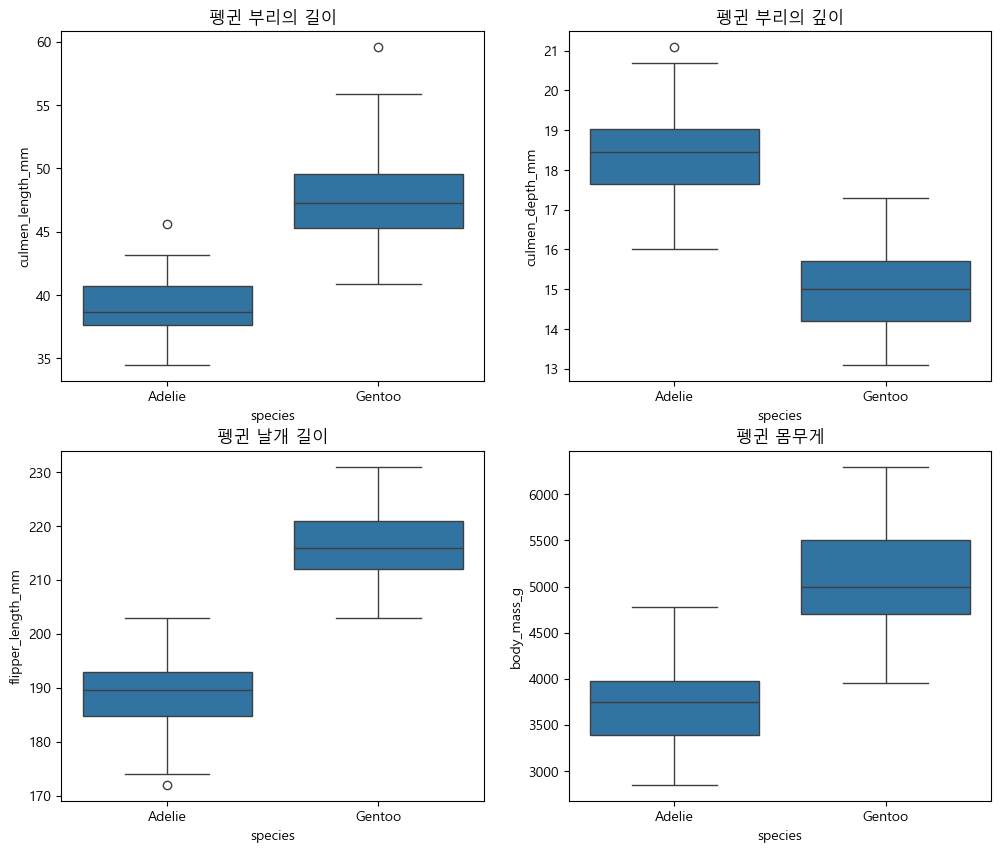

In [28]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x="species", y=columns[i], data=Biscoe_df, ax=ax)
    ax.set_title(titles[i])

plt.show()

### **Dream에 사는 펭귄들의 특징**

In [29]:
Dream_df = df[df["island"] == "Dream"]

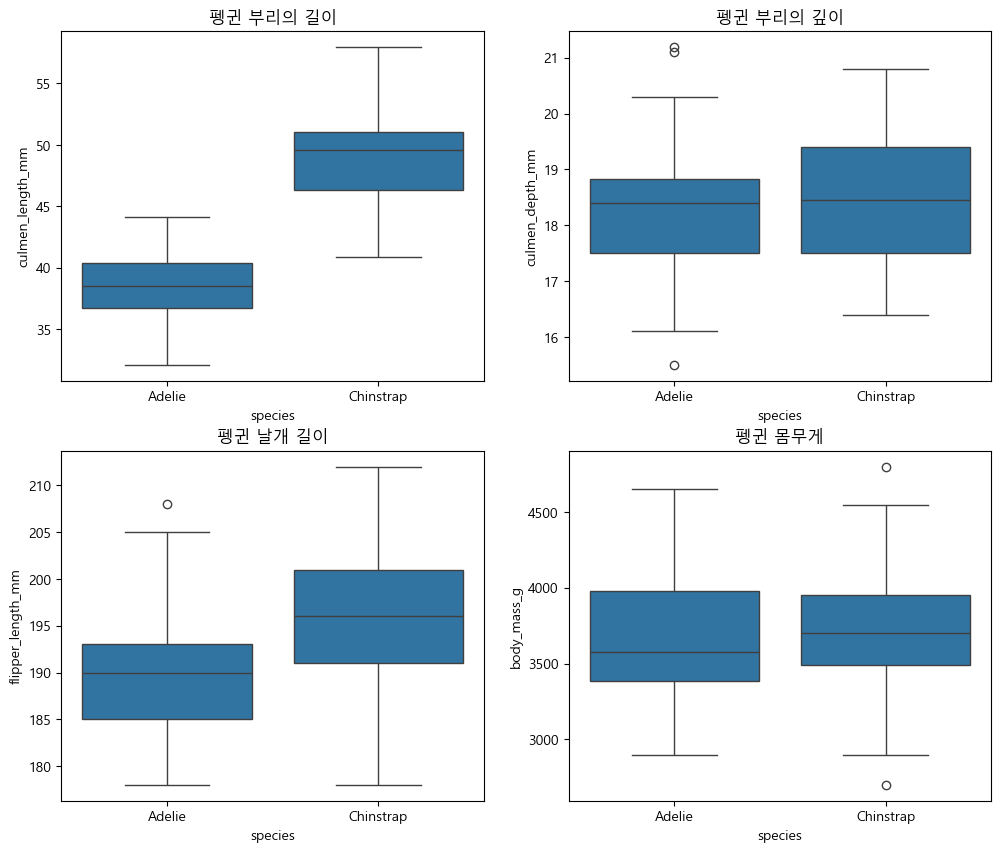

In [30]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(x="species", y=columns[i], data=Dream_df, ax=ax)
    ax.set_title(titles[i])

plt.show()

### **서식지와 종간의 차이**

In [31]:
filtered_df = df[["species", "island", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]

In [32]:
filtered_df.groupby(["island", "sex"]).size()

island     sex   
Biscoe     FEMALE    84
           MALE      83
Dream      FEMALE    62
           MALE      62
Torgersen  FEMALE    27
           MALE      24
dtype: int64

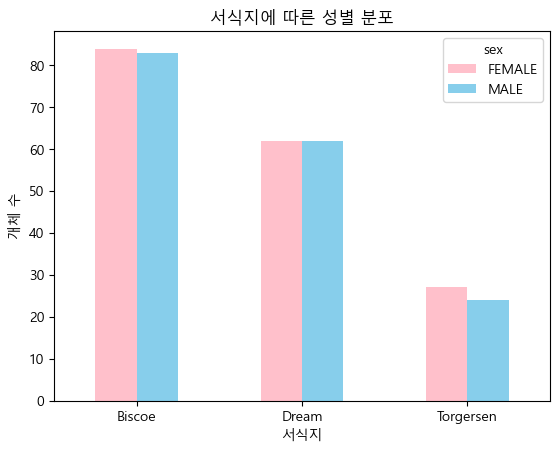

In [33]:
grouped_counts = filtered_df.groupby(["island", "sex"]).size().unstack()

grouped_counts.plot(kind="bar", color=["pink", "skyblue"])
plt.xlabel("서식지")
plt.ylabel("개체 수")
plt.xticks(rotation=0)
plt.title("서식지에 따른 성별 분포")
plt.show()

In [34]:
from scipy.stats import chi2_contingency

# 서식지와 성별의 교차표 생성
contingency_table = pd.crosstab(filtered_df["island"], filtered_df["sex"])

In [35]:
# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 0.13569354855051682
P-value: 0.934403637283276


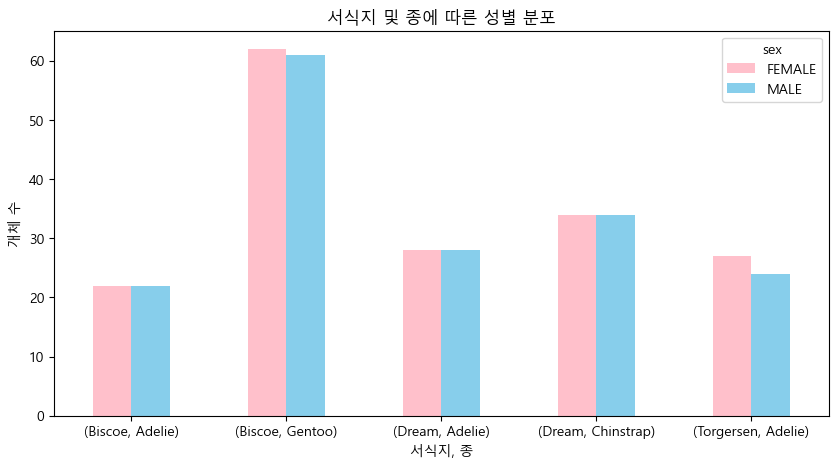

In [36]:
grouped_counts = filtered_df.groupby(["island", "species", "sex"]).size().unstack()

grouped_counts.plot(kind="bar", color=["pink", "skyblue"], figsize=(10, 5))
plt.xlabel("서식지, 종")
plt.ylabel("개체 수")
plt.xticks(rotation=0)
plt.title("서식지 및 종에 따른 성별 분포")
plt.show()

## **서식지별로 Adelie펭귄의 몸무게 차이(ANOVA)**

- 유일하게 Adelie 펭귄만이 3곳의 서식지에 모두 거주
- so) 서식지마다 특징이 다르기 때문에 Adelie펭귄이 모두 3곳의 서식지에 있지 않을까 하는 생각
- so) 서식지마다 특징이 다르니 각 서식지에 사는 Adelie 펭귄의 신체적인 특징도 조금씩 다를것!
- because) 각 서식지에서 살아가기 위해서 신체적인 변화가 있지 않을까 하는 생각 ex)기후에 따른 동물들의 특징이 다르듯이   
➡️귀무가설: 3곳의 서식지에 사는 Adelie펭귄의 몸무게의 평균은 같다.   
➡️대립가설: 3곳의 서식지에 사는 Adelie펭귄 중 특정 2곳에 사는 Adelie펭귄 몸무게의 평균은 다르다.
- but) 3곳의 서식지에 사는 펭귄 모두 부리길이, 부리깊이, 날개길이, 몸무게의 평균의 차이가 있지 않았다.

In [37]:
Adelie_df = df[df["species"] == "Adelie"]

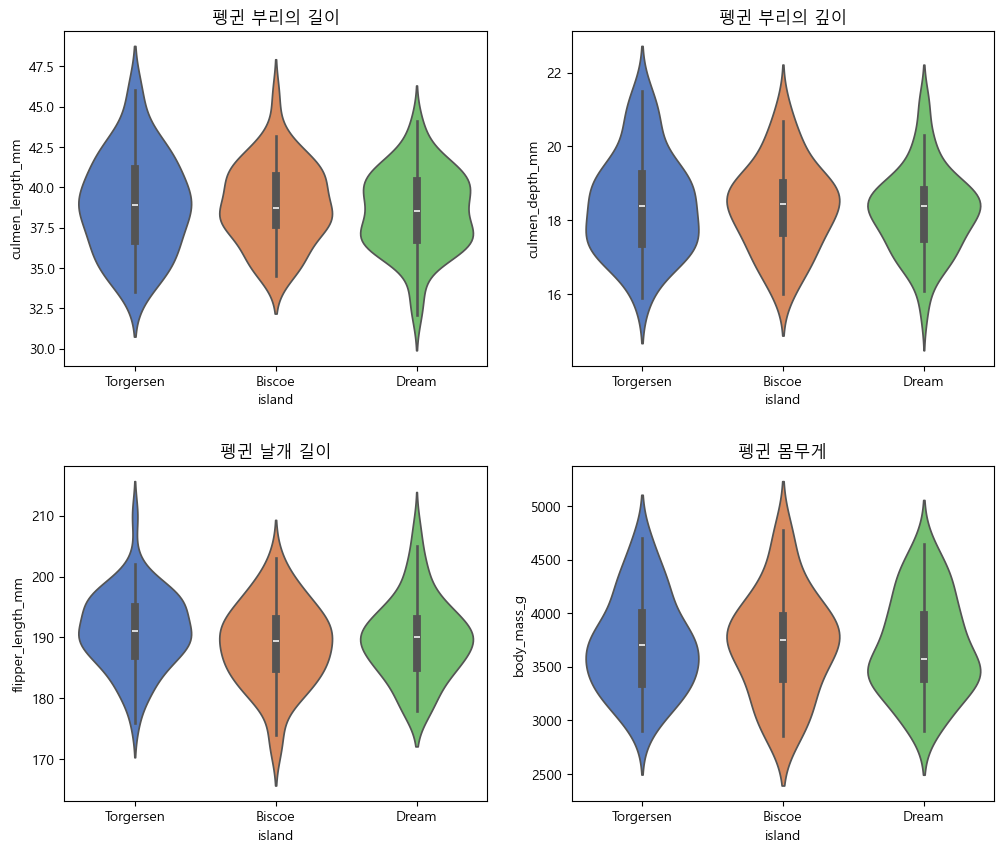

In [38]:
plt.rc("font", family = "Malgun Gothic")

columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
titles = ["펭귄 부리의 길이", "펭귄 부리의 깊이", "펭귄 날개 길이", "펭귄 몸무게"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    sns.violinplot(x="island", y=columns[i], data=Adelie_df, ax=ax, hue="island", palette="muted", legend=False)
    # sns.boxplot(x="island", y=columns[i], data=Adelie_df, ax=ax)
    ax.set_title(titles[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

### **서식지별 Adelie펭귄 몸무게 평균 차이**

In [39]:
groups = []

islands = Adelie_df["island"].unique()

for island in islands:
    groups.append(Adelie_df[Adelie_df["island"] == island]["body_mass_g"])

In [40]:
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p_value:", p_value)
print("서식지에 따른 펭귄 몸무게 귀무 가설 기각 여부:", p_value < 0.05)

F-statistic: 0.032048215914071095
p_value: 0.9684666047614277
서식지에 따른 펭귄 몸무게 귀무 가설 기각 여부: False


### **서식지별 Adelie펭귄 부리 길이 평균 차이**

In [41]:
groups = []

islands = Adelie_df["island"].unique()

for island in islands:
    groups.append(Adelie_df[Adelie_df["island"] == island]["culmen_length_mm"])

In [42]:
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p_value:", p_value)
print("서식지에 따른 펭귄 부리 길이 귀무 가설 기각 여부:", p_value < 0.05)

F-statistic: 0.5238114946629376
p_value: 0.5933526976228705
서식지에 따른 펭귄 부리 길이 귀무 가설 기각 여부: False


### **서식지별 Adelie펭귄 부리 깊이 평균 차이**

In [43]:
groups = []

islands = Adelie_df["island"].unique()

for island in islands:
    groups.append(Adelie_df[Adelie_df["island"] == island]["culmen_depth_mm"])

In [44]:
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p_value:", p_value)
print("서식지에 따른 펭귄 부리 깊이 귀무 가설 기각 여부:", p_value < 0.05)

F-statistic: 0.2938494430090732
p_value: 0.7458225662564812
서식지에 따른 펭귄 부리 깊이 귀무 가설 기각 여부: False


### **서식지별 Adelie펭귄 날개 길이 평균 차이**

In [45]:
groups = []

islands = Adelie_df["island"].unique()

for island in islands:
    groups.append(Adelie_df[Adelie_df["island"] == island]["flipper_length_mm"])

In [46]:
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p_value:", p_value)
print("서식지에 따른 펭귄 날개 길이 귀무 가설 기각 여부:", p_value < 0.05)

F-statistic: 1.657050443359259
p_value: 0.19421877964196532
서식지에 따른 펭귄 날개 길이 귀무 가설 기각 여부: False


## **펭귄 데이터 전처리-2**
* 종-OneHotEncoding / 성별-LabelEncoding

In [47]:
species_dummies = pd.get_dummies(df["species"], prefix="species")
df = pd.concat([df, species_dummies], axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df["sex"])
df["ismale"] = label_encoder.transform(df["sex"])

## **펭귄 회귀식&타당성 검정**

In [49]:
# utils.py 파일 참조
from sklearn.model_selection import train_test_split

def load_penguin_dataset():
    X = df.drop(["body_mass_g"], axis=1)
    y = df["body_mass_g"]
    return train_test_split(X, y, train_size=0.8, random_state=1234) 

In [50]:
x_train, x_test, y_train, y_test = load_penguin_dataset()

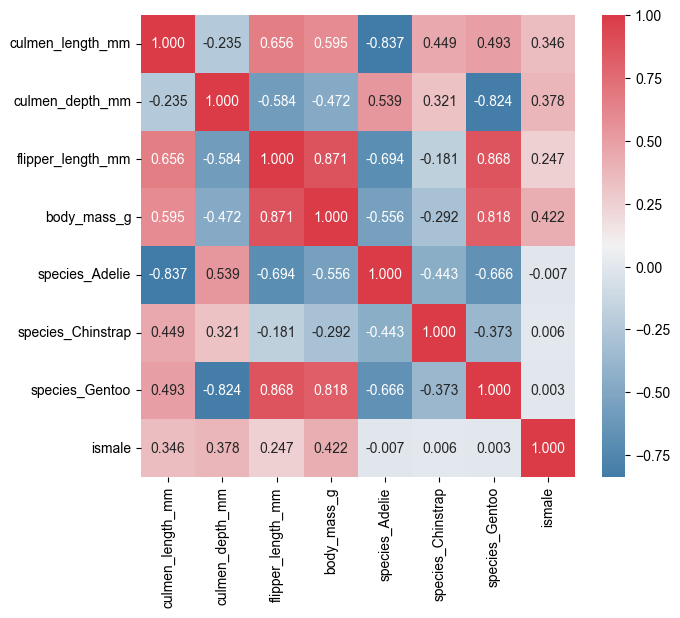

In [51]:
plt.rc("font", family="Arial")
plt.figure(figsize=(7, 6))

cmap = sns.diverging_palette(240, 10, n=10, as_cmap=True)
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".3f",
    cmap=cmap
)

plt.show()

### **전진 선택법으로 다중 선형 회귀 모델 학습**
- body_mass_g과 상관성이 높은 독립변수를 추가하면서 모델을 학습   
  -> flipper_length_mm, species_Gentoo, culmen_length_mm, ismale, species_Chinstrap, culmen_depth_mm, species_Adelie

In [52]:
def train_multiple_linear_regression(X, y):
    x_constant = sm.add_constant(X, has_constant="add")
    model = sm.OLS(y, x_constant)
    results = model.fit()
    return results

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(len(X.columns))]
    return vif.sort_values(by="VIF", ascending=False)

#### **변수선택: flipper_length_mm**

In [54]:
selected_x_train = x_train["flipper_length_mm"]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     857.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           6.07e-86
Time:                        15:38:21   Log-Likelihood:                -2020.9
No. Observations:                 273   AIC:                             4046.
Df Residuals:                     271   BIC:                             4053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5822.6001    343.555    -16.948      0.000   -6498.976   -5146.224
flipper_length_mm    49.8870      1.703     29.288      0.000      46.534      53.240
==============================================================================
Omnibus:                        4.266   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.147
Skew:                           0.302   Prob(JB):                        0.126
Kurtosis:                       3.021   Cond. No.                     2.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **변수선택: flipper_length_mm, species_Gentoo**

In [56]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     471.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           8.89e-89
Time:                        15:38:21   Log-Likelihood:                -2010.6
No. Observations:                 273   AIC:                             4027.
Df Residuals:                     270   BIC:                             4038.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3268.7740    647.955     -5.045      0.000   -4544.460   -1993.088
flipper_length_mm    36.3522      3.377     10.763      0.000      29.703      43.002
species_Gentoo      453.2475     98.806      4.587      0.000     258.718     647.777
==============================================================================
Omnibus:                        3.743   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.681
Skew:                           0.284   Prob(JB):                        0.159
Kurtosis:                       2.974   Cond. No.                     5.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
check_multi_colinearity(selected_x_train)

,Features,VIF
1,species_Gentoo,1.764608
0,flipper_length_mm,1.764608


#### **변수선택: flipper_length_mm, species_Gentoo, culmen_length_mm**

In [59]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     320.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           2.01e-88
Time:                        15:38:21   Log-Likelihood:                -2008.2
No. Observations:                 273   AIC:                             4024.
Df Residuals:                     269   BIC:                             4039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2889.5701    666.204     -4.337      0.000   -4201.207   -1577.933
flipper_length_mm    31.4848      4.020      7.831      0.000      23.569      39.400
species_Gentoo      502.8707    100.685      4.994      0.000     304.639     701.102
culmen_length_mm     13.2325      6.028      2.195      0.029       1.365      25.100
==============================================================================
Omnibus:                        4.222   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.099
Skew:                           0.300   Prob(JB):                        0.129
Kurtosis:                       3.023   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,125.264581
2,culmen_length_mm,124.510206
1,species_Gentoo,1.764609


#### **변수선택: flipper_length_mm, species_Gentoo, culmen_length_mm, ismale**

In [62]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     435.6
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          6.26e-116
Time:                        15:38:21   Log-Likelihood:                -1940.6
No. Observations:                 273   AIC:                             3891.
Df Residuals:                     268   BIC:                             3909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               320.9118    575.637      0.557      0.578    -812.435    1454.258
flipper_length_mm    15.9040      3.361      4.732      0.000       9.287      22.521
species_Gentoo      965.0879     86.266     11.187      0.000     795.242    1134.934
culmen_length_mm      1.4293      4.799      0.298      0.766      -8.019      10.877
ismale              555.0181     42.332     13.111      0.000     471.673     638.363
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.071
Skew:                          -0.019   Prob(JB):                        0.965
Kurtosis:                       2.931   Cond. No.                     6.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
check_multi_colinearity(selected_x_train)

,Features,VIF
2,culmen_length_mm,135.211533
0,flipper_length_mm,129.866399
3,ismale,2.191584
1,species_Gentoo,1.774058


#### **변수선택: flipper_length_mm, species_Gentoo, culmen_length_mm, ismale, species_Chinstrap**

In [65]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale", "species_Chinstrap"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     362.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.05e-116
Time:                        15:38:21   Log-Likelihood:                -1935.6
No. Observations:                 273   AIC:                             3883.
Df Residuals:                     267   BIC:                             3905.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -349.8848    604.785     -0.579      0.563   -1540.640     840.870
flipper_length_mm    15.3626      3.311      4.640      0.000       8.844      21.881
species_Gentoo      768.6995    105.213      7.306      0.000     561.547     975.852
culmen_length_mm     22.9512      8.291      2.768      0.006       6.626      39.276
ismale              479.0094     48.098      9.959      0.000     384.309     573.710
species_Chinstrap  -287.0900     90.927     -3.157      0.002    -466.116    -108.064
==============================================================================
Omnibus:                        0.075   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.074
Skew:                           0.037   Prob(JB):                        0.964
Kurtosis:                       2.968   Cond. No.                     7.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
check_multi_colinearity(selected_x_train)

,Features,VIF
2,culmen_length_mm,408.291026
0,flipper_length_mm,336.773916
4,species_Chinstrap,4.456835
1,species_Gentoo,2.964070
3,ismale,2.602435


#### **변수선택: flipper_length_mm, species_Gentoo, culmen_length_mm, ismale, species_Chinstrap, culmen_depth_mm**

In [68]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale", "species_Chinstrap", "culmen_depth_mm"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     308.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          9.29e-117
Time:                        15:38:21   Log-Likelihood:                -1932.3
No. Observations:                 273   AIC:                             3879.
Df Residuals:                     266   BIC:                             3904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -961.6931    646.333     -1.488      0.138   -2234.272     310.886
flipper_length_mm    13.8911      3.330      4.172      0.000       7.335      20.447
species_Gentoo     1022.4231    144.997      7.051      0.000     736.936    1307.911
culmen_length_mm     20.4507      8.270      2.473      0.014       4.168      36.733
ismale              416.7493     53.671      7.765      0.000     311.074     522.424
species_Chinstrap  -249.6087     91.257     -2.735      0.007    -429.287     -69.930
culmen_depth_mm      55.3334     21.994      2.516      0.012      12.029      98.638
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.170
Skew:                           0.055   Prob(JB):                        0.919
Kurtosis:                       3.055   Cond. No.                     7.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,680.954686
2,culmen_length_mm,423.798058
5,culmen_depth_mm,397.501377
1,species_Gentoo,22.716508
4,species_Chinstrap,4.871222
3,ismale,2.893551


#### **변수선택: flipper_length_mm, species_Gentoo, culmen_length_mm, ismale, species_Chinstrap, culmen_depth_mm, species_Adelie**

In [71]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale", "species_Chinstrap", "culmen_depth_mm", "species_Adelie"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     308.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          9.29e-117
Time:                        15:38:22   Log-Likelihood:                -1932.3
No. Observations:                 273   AIC:                             3879.
Df Residuals:                     266   BIC:                             3904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -528.0662    504.800     -1.046      0.296   -1521.978     465.846
flipper_length_mm    13.8911      3.330      4.172      0.000       7.335      20.447
species_Gentoo      588.7962    212.791      2.767      0.006     169.828    1007.765
culmen_length_mm     20.4507      8.270      2.473      0.014       4.168      36.733
ismale              416.7493     53.671      7.765      0.000     311.074     522.424
species_Chinstrap  -683.2356    177.242     -3.855      0.000   -1032.211    -334.260
culmen_depth_mm      55.3334     21.994      2.516      0.012      12.029      98.638
species_Adelie     -433.6269    152.040     -2.852      0.005    -732.981    -134.273
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.170
Skew:                           0.055   Prob(JB):                        0.919
Kurtosis:                       3.055   Cond. No.                     1.89e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
check_multi_colinearity(selected_x_train)

,Features,VIF
1,species_Gentoo,602.918465
6,species_Adelie,583.365886
4,species_Chinstrap,286.457964
0,flipper_length_mm,7.174898
2,culmen_length_mm,6.313672
5,culmen_depth_mm,6.229788
3,ismale,2.325148


### **VIF를 이용한 변수 선택(결론, flipper_length_mm, species_Gentoo, ismale을 선택하는 것이 최고의 상태!)**
* flipper_length_mm, species_Gentoo, culmen_length_mm, ismale, species_Chinstrap, culmen_depth_mm, species_Adelie 순의 상관관계
* species_Adelie이 있을 때랑 없을 때의 R2의 값이 같은 것을 알 수 있어 단, VIF값에서의 차이는 있어

#### **species_Adelie 제거**
- species_Adelie컬럼이 있는 경우와 없는 경우를 비교해 봤을 때 summary들의 지표의 차이가 없고 VIF만의 차이가 있다.
- body_mass_g과의 상관관계도 작아   
  ➡️결론, VIF값만의 차이가 있고 다른 지표에서는 차이가 없어

In [74]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale", "culmen_depth_mm", "species_Chinstrap"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     308.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          9.29e-117
Time:                        15:38:22   Log-Likelihood:                -1932.3
No. Observations:                 273   AIC:                             3879.
Df Residuals:                     266   BIC:                             3904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -961.6931    646.333     -1.488      0.138   -2234.272     310.886
flipper_length_mm    13.8911      3.330      4.172      0.000       7.335      20.447
species_Gentoo     1022.4231    144.997      7.051      0.000     736.936    1307.911
culmen_length_mm     20.4507      8.270      2.473      0.014       4.168      36.733
ismale              416.7493     53.671      7.765      0.000     311.074     522.424
culmen_depth_mm      55.3334     21.994      2.516      0.012      12.029      98.638
species_Chinstrap  -249.6087     91.257     -2.735      0.007    -429.287     -69.930
==============================================================================
Omnibus:                        0.299   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.170
Skew:                           0.055   Prob(JB):                        0.919
Kurtosis:                       3.055   Cond. No.                     7.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,680.954686
2,culmen_length_mm,423.798058
4,culmen_depth_mm,397.501377
1,species_Gentoo,22.716508
5,species_Chinstrap,4.871222
3,ismale,2.893551


#### **species_Chinstrap, culmen_depth_mm제거 -> species_Adelie, culmen_depth_mm제거**
- culmen_depth_mm가 flipper_length_mm와 음의 상관관계를 가지고 있어
- body_mass_g과의 상관관계도 작아  
  ➡️결론, R2값은 감소, f값은 증가 & VIF값들도 날개, 부리를 제외한 값들은 10이하인 것을 알 수 있어

In [77]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "culmen_length_mm", "ismale", "species_Chinstrap"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     362.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          1.05e-116
Time:                        15:38:22   Log-Likelihood:                -1935.6
No. Observations:                 273   AIC:                             3883.
Df Residuals:                     267   BIC:                             3905.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -349.8848    604.785     -0.579      0.563   -1540.640     840.870
flipper_length_mm    15.3626      3.311      4.640      0.000       8.844      21.881
species_Gentoo      768.6995    105.213      7.306      0.000     561.547     975.852
culmen_length_mm     22.9512      8.291      2.768      0.006       6.626      39.276
ismale              479.0094     48.098      9.959      0.000     384.309     573.710
species_Chinstrap  -287.0900     90.927     -3.157      0.002    -466.116    -108.064
==============================================================================
Omnibus:                        0.075   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.074
Skew:                           0.037   Prob(JB):                        0.964
Kurtosis:                       2.968   Cond. No.                     7.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
check_multi_colinearity(selected_x_train)

,Features,VIF
2,culmen_length_mm,408.291026
0,flipper_length_mm,336.773916
4,species_Chinstrap,4.456835
1,species_Gentoo,2.964070
3,ismale,2.602435


#### **species_Chinstrap, culmen_depth_mm, culmen_length_mm제거 -> species_Adelie, culmen_depth_mm, culmen_length_mm제거**
- culmen_length_mm가 flipper_length_mm와 양의 상관관계를 가지고 있어
- body_mass_g과 상관관계도 높아서 제거하면 VIF값을 줄일 수 있을 것   
  ➡️결론, R2값은 감소, f값은 증가 & 모든 VIF값들이 10이하 단, species_Adelie p값이 0.127로 유의하지 않다

In [80]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "ismale", "species_Chinstrap"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     439.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.04e-116
Time:                        15:38:22   Log-Likelihood:                -1939.4
No. Observations:                 273   AIC:                             3889.
Df Residuals:                     268   BIC:                             3907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8774    598.804     -0.001      0.999   -1179.835    1178.080
flipper_length_mm    18.0473      3.204      5.632      0.000      11.738      24.356
species_Gentoo      893.5835     96.223      9.287      0.000     704.134    1083.033
ismale              546.1036     42.058     12.985      0.000     463.298     628.910
species_Chinstrap   -80.1689     52.407     -1.530      0.127    -183.350      23.012
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.243
Skew:                           0.018   Prob(JB):                        0.886
Kurtosis:                       2.859   Cond. No.                     6.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,3.783463
1,species_Gentoo,2.139119
2,ismale,2.018930
3,species_Chinstrap,1.475946


#### **species_Chinstrap, culmen_depth_mm, culmen_length_mm, species_Adelie제거**
- species_Adelie의 p값이 0.05보다 크다.
- body_mess_g과의 상관관계도 가장 낮아.   
  ➡️결론, R2값은 다른 지표들에 비해서 많이 줄어들었지만, f값은 많이 증가, p값도 0.05보다 작고, Skew & Kurtosis도 정상범위?에 속하는 것을 알 수 있어 또한 컬럼의 VIF값들이 모두 10이하!!

In [83]:
selected_x_train = x_train[["flipper_length_mm", "species_Gentoo", "ismale"]]
results = train_multiple_linear_regression(selected_x_train, y_train)

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     582.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.49e-117
Time:                        15:38:22   Log-Likelihood:                -1940.6
No. Observations:                 273   AIC:                             3889.
Df Residuals:                     269   BIC:                             3904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               295.0758    568.099      0.519      0.604    -823.411    1413.562
flipper_length_mm    16.3449      3.012      5.426      0.000      10.414      22.276
species_Gentoo      961.8864     85.449     11.257      0.000     793.653    1130.120
ismale              557.3833     41.510     13.428      0.000     475.658     639.108
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.095
Skew:                          -0.014   Prob(JB):                        0.954
Kurtosis:                       2.913   Cond. No.                     6.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,2.904936
2,ismale,2.018131
1,species_Gentoo,1.773273


## **Multiple Linear Regressions, Lasso, Ridge**

In [86]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
columns = ["flipper_length_mm", "species_Gentoo", "ismale"]
x_train = x_train[columns]
x_test = x_test[columns]

In [88]:
models = [
    ("multiple linear regression", LinearRegression()),
    ("lasso", Lasso()),
    ("ridge", Ridge()) 
]

In [89]:
models = [
    ("multiple linear regression", LinearRegression()),
    ("lasso", Lasso(alpha=5)),
    ("ridge", Ridge(alpha=5)) 
]

In [90]:
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(model_name)
    print("r2_score", r2_score(y_test, y_pred))
    print("RMSE score", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("conefficient abs sum", np.abs(model.coef_).sum())
    print("=========================================================")

multiple linear regression
r2_score 0.8504242873449223
RMSE score 294.5099718820258
conefficient abs sum 1535.614560850026
lasso
r2_score 0.8535050632399187
RMSE score 291.4612151406009
conefficient abs sum 1356.9589170115378
ridge
r2_score 0.8530403886111846
RMSE score 291.9230993768378
conefficient abs sum 1135.1026374334285


In [91]:
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(model_name)
    print("r2_score", r2_score(y_test, y_pred))
    print("RMSE score", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("conefficient abs sum", np.abs(model.coef_).sum())
    print("=========================================================")

multiple linear regression
r2_score 0.8504242873449223
RMSE score 294.5099718820258
conefficient abs sum 1535.614560850026
lasso
r2_score 0.8535050632399187
RMSE score 291.4612151406009
conefficient abs sum 1356.9589170115378
ridge
r2_score 0.8530403886111846
RMSE score 291.9230993768378
conefficient abs sum 1135.1026374334285
